In [1]:
# Gerekli kütüphaneleri yükleyelim
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Veri kümesini okuyalım
data = pd.read_csv('Fraud.csv')  # Veri kümenizi buraya yükleyin


In [3]:
# Özellikler ve hedef değişkeni ayıralım
X = data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]  # Özellikler
y = data['isFraud']  # Hedef değişken

# Veriyi eğitim ve test olarak bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost modelini tanımlayalım
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # İkili sınıflandırma
    n_estimators=100,  # Toplam ağaç sayısı
    learning_rate=0.1,  # Öğrenme oranı
    max_depth=6,  # Her ağacın maksimum derinliği
    random_state=42
)

In [4]:
# Modeli eğitelim
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [5]:
# Tahminlerde bulunalım
y_pred = xgb_model.predict(X_test)

In [6]:
# Performans metriklerini hesaplayalım
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Performansı yazdıralım
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")

Doğruluk (Accuracy): 0.9996
Kesinlik (Precision): 0.9591
Duyarlılık (Recall): 0.6951
F1 Skoru: 0.8060


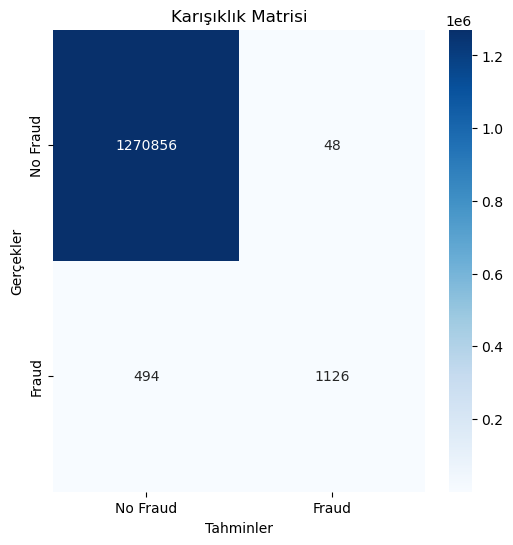

In [7]:
# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)

# Karışıklık matrisi görselleştirme
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahminler')
plt.ylabel('Gerçekler')
plt.show()

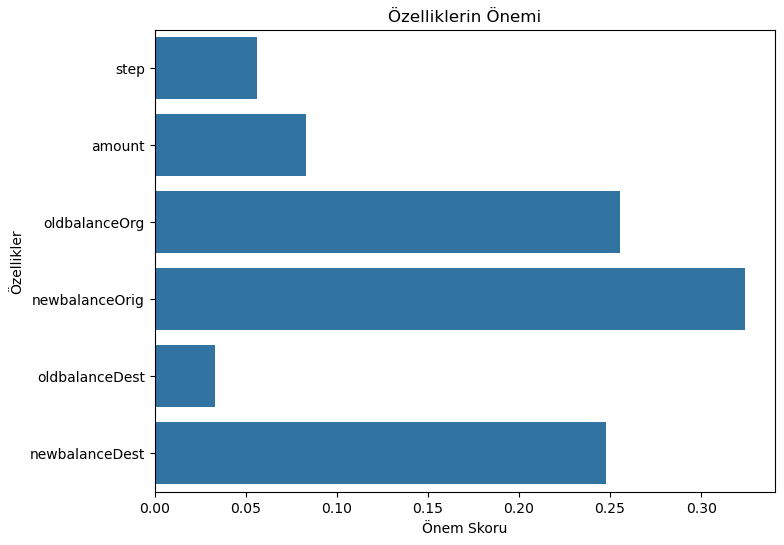


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.70      0.81      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.85      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



In [8]:
# Özellik önemini analiz etme
feature_importances = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Özelliklerin Önemi')
plt.xlabel('Önem Skoru')
plt.ylabel('Özellikler')
plt.show()

# Ayrıntılı sınıflandırma raporu
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))